In [40]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
sd = dataset['train'].to_pandas()

sd['job_posted_date'] = pd.to_datetime(sd['job_posted_date'])
sd['job_skills'] = sd['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [41]:
sd_DA_in = sd[(sd['job_title_short']== 'Data Analyst') & (sd['job_country'] == 'India')] .copy()


In [42]:
sd_DA_in = sd_DA_in.dropna(subset=['salary_year_avg'])
sd_DA_in_explode = sd_DA_in.explode('job_skills')

sd_DA_in_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [43]:
sd_DA_skills = sd_DA_in_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
sd_DA_skills = sd_DA_skills.rename(columns= {'count' : 'skill_count', 'median': 'median_salary'})
job_count_DA = len(sd_DA_in)
sd_DA_skills['skill_perc'] = sd_DA_skills['skill_count']/job_count_DA * 100
perc_skill = 10
sd_DA_high_dem = sd_DA_skills[sd_DA_skills['skill_perc']> perc_skill]
sd_DA_high_dem

,skill_count,median_salary,skill_perc
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


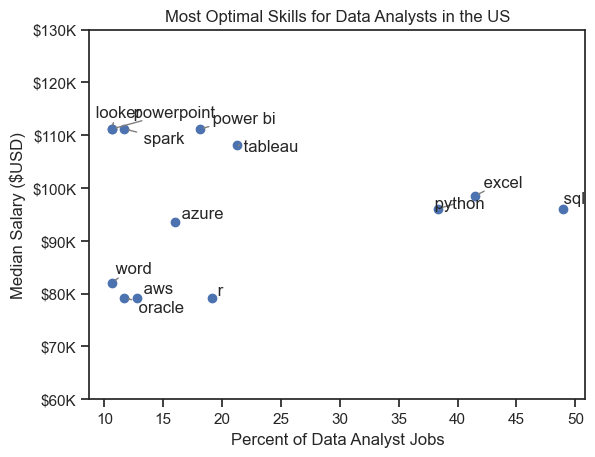

In [44]:
from adjustText import adjust_text

plt.scatter(sd_DA_high_dem['skill_perc'], sd_DA_high_dem['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.set_ylim(60000, 130000)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(sd_DA_high_dem.index):
    texts.append(plt.text(sd_DA_high_dem['skill_perc'].iloc[i], sd_DA_high_dem['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [45]:
sd_technology = sd['job_type_skills'].copy()
sd_technology = sd_technology.drop_duplicates()
sd_technology = sd_technology.dropna()
technology_dict = {}
for row in sd_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:                     
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'outlook',
  'spreadsheet',
  'sheets',
  'ssrs',
  'msaccess',
  'tableau',
  'datarobot',
  'cognos',
  'sharepoint',
  'microstrategy',
  'excel',
  'sas',
  'spss',
  'qlik',
  'ssis',
  'powerbi',
  'power bi',
  'visio',
  'looker',
  'splunk',
  'ms access',
  'nuix',
  'dax',
  'alteryx',
  'word',
  'esquisse',
  'powerpoint'],
 'programming': ['matlab',
  'fortran',
  'php',
  'elixir',
  'typescript',
  'kotlin',
  't-sql',
  'rust',
  'nosql',
  'mongodb',
  'haskell',
  'mongo',
  'pascal',
  'swift',
  'java',
  'visual basic',
  'no-sql',
  'powershell',
  'golang',
  'objective-c',
  'ocaml',
  'cobol',
  'css',
  'python',
  'sas',
  'assembly',
  'c++',
  'perl',
  'ruby',
  'dart',
  'julia',
  'go',
  'c#',
  'lua',
  'javascript',
  'apl',
  'scala',
  'crystal',
  'bash',
  'solidity',
  'r',
  'groovy',
  'erlang',
  'delphi',
  'sql',
  'vba',
  'visualbasic',
  'vb.net',
  'sass',
  'f#',
  'shell',
  'clojure',
  'c',
  'html',
  'l

In [46]:
sd_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
sd_technology = sd_technology.explode('skills')
sd_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,outlook
0,analyst_tools,spreadsheet
0,analyst_tools,sheets
0,analyst_tools,ssrs
...,...,...
9,sync,slack
9,sync,google chat
9,sync,symphony
9,sync,zoom


In [47]:
sd_DA_high_dem = sd_DA_high_dem.merge(sd_technology, left_on='job_skills', right_on= 'skills')
sd_DA_high_dem

,skill_count,median_salary,skill_perc,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


In [52]:
sd_high_dem = sd_DA_high_dem[sd_DA_high_dem['skill_perc'] > perc_skill]
sd_high_dem


,skill_count,median_salary,skill_perc,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


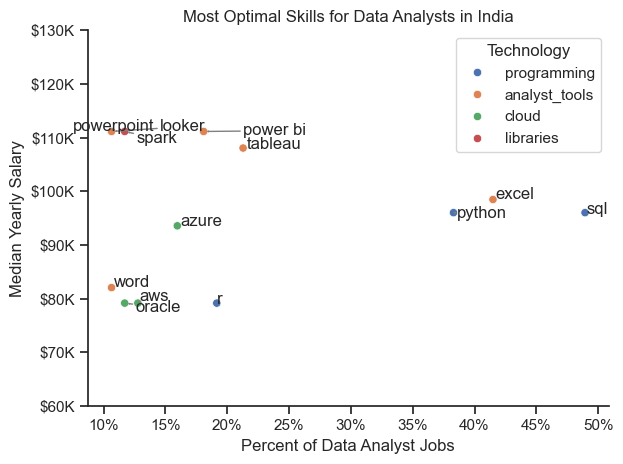

In [56]:
sns.scatterplot(
    data=sd_high_dem,
    x='skill_perc',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
texts = []
for i, txt in enumerate(sd_high_dem['skills']):
    texts.append(plt.text(sd_high_dem['skill_perc'].iloc[i], sd_high_dem['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.set_ylim(60000, 130000)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()